In [1]:
import requests
import re
import urllib.request
from bs4 import BeautifulSoup
from collections import deque
from html.parser import HTMLParser
from urllib.parse import urlparse
import os

# Regex pattern to match a URL
HTTP_URL_PATTERN = r'^http[s]*://.+'

# Define root domain to crawl
domain = "openai.com"
full_url = "https://openai.com/"

# Create a class to parse the HTML and get the hyperlinks
class HyperlinkParser(HTMLParser):
    def __init__(self):
        super().__init__()
        # Create a list to store the hyperlinks
        self.hyperlinks = []

    # Override the HTMLParser's handle_starttag method to get the hyperlinks
    def handle_starttag(self, tag, attrs):
        attrs = dict(attrs)

        # If the tag is an anchor tag and it has an href attribute, add the href attribute to the list of hyperlinks
        if tag == "a" and "href" in attrs:
            self.hyperlinks.append(attrs["href"])

# Function to get the hyperlinks from a URL
def get_hyperlinks(url):
    
    # Try to open the URL and read the HTML
    try:
        # Open the URL and read the HTML
        with urllib.request.urlopen(url) as response:

            # If the response is not HTML, return an empty list
            if not response.info().get('Content-Type').startswith("text/html"):
                return []
            
            # Decode the HTML
            html = response.read().decode('utf-8')
    except Exception as e:
        print(e)
        return []

    # Create the HTML Parser and then Parse the HTML to get hyperlinks
    parser = HyperlinkParser()
    parser.feed(html)

    return parser.hyperlinks

# Function to get the hyperlinks from a URL that are within the same domain
def get_domain_hyperlinks(local_domain, url):
    clean_links = []
    for link in set(get_hyperlinks(url)):
        clean_link = None

        # If the link is a URL, check if it is within the same domain
        if re.search(HTTP_URL_PATTERN, link):
            # Parse the URL and check if the domain is the same
            url_obj = urlparse(link)
            if url_obj.netloc == local_domain:
                clean_link = link

        # If the link is not a URL, check if it is a relative link
        else:
            if link.startswith("/"):
                link = link[1:]
            elif link.startswith("#") or link.startswith("mailto:"):
                continue
            clean_link = "https://" + local_domain + "/" + link

        if clean_link is not None:
            if clean_link.endswith("/"):
                clean_link = clean_link[:-1]
            clean_links.append(clean_link)

    # Return the list of hyperlinks that are within the same domain
    return list(set(clean_links))


def crawl(url):
    # Parse the URL and get the domain
    local_domain = urlparse(url).netloc

    # Create a queue to store the URLs to crawl
    queue = deque([url])

    # Create a set to store the URLs that have already been seen (no duplicates)
    seen = set([url])

    # Create a directory to store the text files
    if not os.path.exists("text/"):
            os.mkdir("text/")

    if not os.path.exists("text/"+local_domain+"/"):
            os.mkdir("text/" + local_domain + "/")

    # Create a directory to store the csv files
    if not os.path.exists("processed"):
            os.mkdir("processed")

    # While the queue is not empty, continue crawling
    while queue:

        # Get the next URL from the queue
        url = queue.pop()
        print(url) # for debugging and to see the progress

        # Save text from the url to a <url>.txt file
        with open('text/'+local_domain+'/'+url[8:].replace("/", "_") + ".txt", "w") as f:

            # Get the text from the URL using BeautifulSoup
            soup = BeautifulSoup(requests.get(url).text, "html.parser")

            # Get the text but remove the tags
            text = soup.get_text()

            # If the crawler gets to a page that requires JavaScript, it will stop the crawl
            if ("You need to enable JavaScript to run this app." in text):
                print("Unable to parse page " + url + " due to JavaScript being required")
            
            # Otherwise, write the text to the file in the text directory
            f.write(text)

        # Get the hyperlinks from the URL and add them to the queue
        for link in get_domain_hyperlinks(local_domain, url):
            if link not in seen:
                queue.append(link)
                seen.add(link)

crawl(full_url)

https://openai.com/
https://openai.com/blog/tags/announcements
https://openai.com/blog/dall-e-now-available-in-beta
https://openai.com/blog/dall-e-2-extending-creativity
https://openai.com/blog/tags/community
https://openai.com/blog/authors/openai
https://openai.com/blog/forecasting-misuse
https://openai.com/forecasting-misuse-paper
HTTP Error 403: Forbidden
https://openai.com/blog/summarizing-books
https://openai.com/blog/dall-e
https://openai.com/blog/authors/aditya
https://openai.com/blog/authors/rewon
https://openai.com/blog/sparse-transformer
https://openai.com/blog/block-sparse-gpu-kernels
https://openai.com/blog/authors/alec
https://openai.com/blog/tags/gpt-2
https://openai.com/blog/gpt-2-1-5b-release
https://openai.com/blog/authors/miles
https://openai.com/blog/language-model-safety-and-misuse
https://openai.com/blog/instruction-following
https://openai.com/blog/improving-language-model-behavior
https://openai.com/blog/authors/christy
https://openai.com/blog/tags/five
https://o

In [4]:
def remove_newlines(serie):
    serie = serie.str.replace('\n', ' ')
    serie = serie.str.replace('\\n', ' ')
    serie = serie.str.replace('  ', ' ')
    serie = serie.str.replace('  ', ' ')
    return serie

In [5]:
import pandas as pd

# Create a list to store the text files
texts=[]

# Get all the text files in the text directory
for file in os.listdir("text/" + domain + "/"):

    # Open the file and read the text
    with open("text/" + domain + "/" + file, "r") as f:
        text = f.read()

        # Omit the first 11 lines and the last 4 lines, then replace -, _, and #update with spaces.
        texts.append((file[11:-4].replace('-',' ').replace('_', ' ').replace('#update',''), text))

# Create a dataframe from the list of texts
df = pd.DataFrame(texts, columns = ['fname', 'text'])

# Set the text column to be the raw text with the newlines removed
df['text'] = df.fname + ". " + remove_newlines(df.text)
df.to_csv('processed/scraped.csv')
df.head()

/tmp/ipykernel_3948/2931785837.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  serie = serie.str.replace('\\n', ' ')


,fname,text
0,,. OpenAI Introducing ChatGPT resea...
1,blog tags announcements,blog tags announcements. Announcements - Ope...
2,blog dall e now available in beta,blog dall e now available in beta. DALL·E No...
3,blog dall e 2 extending creativity,blog dall e 2 extending creativity. DALL·E 2...
4,blog tags community,blog tags community. Community - OpenAI ...


<AxesSubplot: >

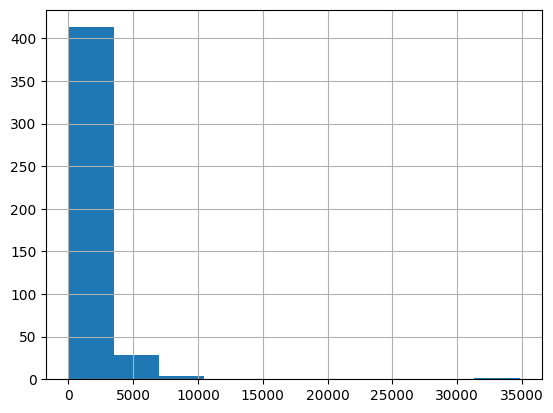

In [6]:
import tiktoken

# Load the cl100k_base tokenizer which is designed to work with the ada-002 model
tokenizer = tiktoken.get_encoding("cl100k_base")

df = pd.read_csv('processed/scraped.csv', index_col=0)
df.columns = ['title', 'text']

# Tokenize the text and save the number of tokens to a new column
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

# Visualize the distribution of the number of tokens per row using a histogram
df.n_tokens.hist()

In [7]:
max_tokens = 500

# Function to split the text into chunks of a maximum number of tokens
def split_into_many(text, max_tokens = max_tokens):

    # Split the text into sentences
    sentences = text.split('. ')

    # Get the number of tokens for each sentence
    n_tokens = [len(tokenizer.encode(" " + sentence)) for sentence in sentences]
    
    chunks = []
    tokens_so_far = 0
    chunk = []

    # Loop through the sentences and tokens joined together in a tuple
    for sentence, token in zip(sentences, n_tokens):

        # If the number of tokens so far plus the number of tokens in the current sentence is greater 
        # than the max number of tokens, then add the chunk to the list of chunks and reset
        # the chunk and tokens so far
        if tokens_so_far + token > max_tokens:
            chunks.append(". ".join(chunk) + ".")
            chunk = []
            tokens_so_far = 0

        # If the number of tokens in the current sentence is greater than the max number of 
        # tokens, go to the next sentence
        if token > max_tokens:
            continue

        # Otherwise, add the sentence to the chunk and add the number of tokens to the total
        chunk.append(sentence)
        tokens_so_far += token + 1

    return chunks
    

shortened = []

# Loop through the dataframe
for row in df.iterrows():

    # If the text is None, go to the next row
    if row[1]['text'] is None:
        continue

    # If the number of tokens is greater than the max number of tokens, split the text into chunks
    if row[1]['n_tokens'] > max_tokens:
        shortened += split_into_many(row[1]['text'])
    
    # Otherwise, add the text to the list of shortened texts
    else:
        shortened.append( row[1]['text'] )

<AxesSubplot: >

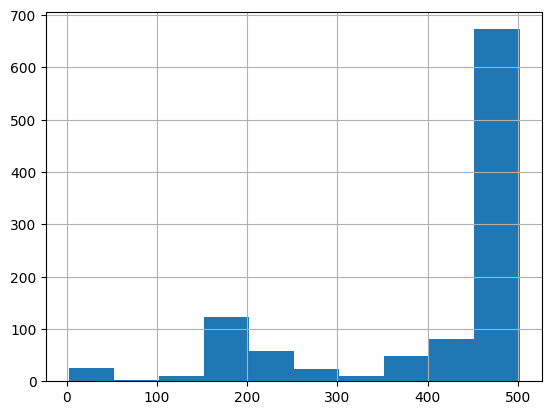

In [8]:
df = pd.DataFrame(shortened, columns = ['text'])
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))
df.to_csv('processed/shortened.csv')
df.n_tokens.hist()

In [11]:
import requests
VAULT_ID = "dev";
URL = "https://embedbase-hosted-usx5gpslaq-uc.a.run.app";
API_KEY = "https://app.embedbase.xyz/dashboard";
df = pd.read_csv('processed/shortened.csv', index_col=0)
async def embed(texts):
    r = requests.post(
        URL + "/v1/" + VAULT_ID,
        headers = {
            "Authorization": "Bearer " + API_KEY,
            "Content-Type": "application/json"
        },
        json = {
            # documents is like [{"data": "hello world"}, {"data": "hello world"}]
            "documents": texts,
        }
    )
    r.raise_for_status()
    return r.json()


# create batches of text from the dataframe
batches = []
for i in range(0, len(df), 100):
    batches.append(df.iloc[i:i+100].text.apply(lambda x: {"data": x}).tolist())
import asyncio
# run batches in parallel
await asyncio.gather(*[embed(batch) for batch in batches])

[{'status': 'success',
  'ignored_ids': [],
  'inserted_ids': ['9b5625bb1d4206e84cf0c0ac22974bb8af61719a97371e02baee86e7128923e3',
   '3fb1c6bce04c905a7f9a97845940e8c5641936e79333cf4e9969b9ea017f8b4a',
   '74e99a9ac37f14efe36e1adb6075cda098a424c00aeb6b4d0cca15776cb0a4b9',
   '717f43cc1ea3f740f2d640681f3d4cf51a0a9b27f8b80aaf7ad9efb59dffbdd0',
   'cc1e6cc03d6441fa3a4a4ce4db98fec2891e9f1e5624bec84f800c0b36577c1a',
   '9d724d1fad4172e4112738f4b17ef50ead8f1b9046ebb71388196a9f51f4423d',
   '5d9739fc3f4e566ac1a1a859580e75b9684ab0a08bd63d38dba06007a250fe9a',
   '34688c63089e8a0e1fb339517b90e4f7e84dea7739d8b5feb96e274a35a0ce3c',
   '0645a52f4f809b07aa22b8437439e0fc04384efa0261b325f27b8f00c7972dc6',
   'b30836573be9685d7291a5257f67dae01c91cf915681c22ab4b921a612c54b2d']},
 {'status': 'success',
  'ignored_ids': [],
  'inserted_ids': ['730ebc0ac2780c06c6dcfce0c94ced08e123a5356ce09bc11e0aace5d8ade552',
   '2f929bb16699e6943acca30336901a0b43d8af9219c198c067396c3d69ac3585',
   '4ac76b23edef9d38991b32

In [12]:
import openai
openai.api_key = "https://platform.openai.com/account/api-keys"

def search(query, vault_id):
    return requests.post(
        URL + "/v1/" + vault_id + "/search",
        headers = {
            "Authorization": "Bearer " + API_KEY,
            "Content-Type": "application/json"
        },
        json = {
            "query": query
        }
    )

def create_context(
    question, max_len=1800
):
    """
    Create a context for a question by finding the most similar context from the dataframe
    """
    search_response = search(question, VAULT_ID).json()
    cur_len = 0
    returns = []
    # Add the text to the context until the context is too long
    for similarity in search_response["similarities"]:
        sentence = similarity["data"]

        # Add the length of the text to the current length
        n_tokens = len(tokenizer.encode(sentence))
        cur_len += n_tokens + 4
        
        # If the context is too long, break
        if cur_len > max_len:
            break
        
        # Else add it to the text that is being returned
        returns.append(sentence)

    # Return the context
    return "\n\n###\n\n".join(returns)

def answer_question(
    model="text-davinci-003",
    question="Am I allowed to publish model outputs to Twitter, without a human review?",
    max_len=1800,
    debug=False,
    max_tokens=150,
    stop_sequence=None
):
    """
    Answer a question based on the most similar context from the dataframe texts
    """
    context = create_context(
        question,
        max_len=max_len,
    )
    # If debug, print the raw model response
    if debug:
        print("Context:\n" + context)
        print("\n\n")

    try:
        # Create a completions using the question and context
        response = openai.Completion.create(
            prompt=f"Answer the question based on the context below, and if the question can't be answered based on the context, say \"I don't know\"\n\nContext: {context}\n\n---\n\nQuestion: {question}\nAnswer:",
            temperature=0,
            max_tokens=max_tokens,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
            stop=stop_sequence,
            model=model,
        )
        return response["choices"][0]["text"].strip()
    except Exception as e:
        print(e)
        return ""

In [14]:
answer_question(question="What day is it?", debug=False)

"I don't know."

In [15]:
answer_question(question="What is our newest embeddings model?")

'The newest embeddings model is the 2022 New and Improved Embedding Model.'

In [16]:
answer_question(question="What is ChatGPT?")

'ChatGPT is a research release from OpenAI that enables the editing and insertion of content into existing text.'